# <center>Flight Price Prediction</center>

# <h2>Importing the Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\ferna\Downloads\Data_Train.xlsx")
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [4]:

data['clean_arrival_time'] = data['Arrival_Time'].str.extract(r'(\d{1,2}:\d{2})')
data = data.dropna(subset=['clean_arrival_time'])
data[['Arrival_Hour','Arrival__Minute']] = data['clean_arrival_time'].str.split(':',expand=True).astype(int)

data['clean_dep_time'] = data['Dep_Time'].str.extract(r'(\d{1,2}:\d{2})')
data = data.dropna(subset=['clean_dep_time'])
data[['Departure_Hour','Departure__Minute']] = data['clean_dep_time'].str.split(':',expand=True).astype(int)




In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,clean_arrival_time,Arrival_Hour,Arrival__Minute,clean_dep_time,Departure_Hour,Departure__Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,01:10,1,10,22:20,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13:15,13,15,05:50,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,04:25,4,25,09:25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,23:30,23,30,18:05,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,21:35,21,35,16:50,16,50


In [6]:
data.drop(columns=['Dep_Time','Arrival_Time','clean_arrival_time','clean_dep_time'],inplace=True)

# EDA

In [7]:
data.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                1
Duration             0
Total_Stops          1
Additional_Info      0
Price                0
Arrival_Hour         0
Arrival__Minute      0
Departure_Hour       0
Departure__Minute    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10682 non-null  object
 5   Duration           10683 non-null  object
 6   Total_Stops        10682 non-null  object
 7   Additional_Info    10683 non-null  object
 8   Price              10683 non-null  int64 
 9   Arrival_Hour       10683 non-null  int64 
 10  Arrival__Minute    10683 non-null  int64 
 11  Departure_Hour     10683 non-null  int64 
 12  Departure__Minute  10683 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


<Axes: >

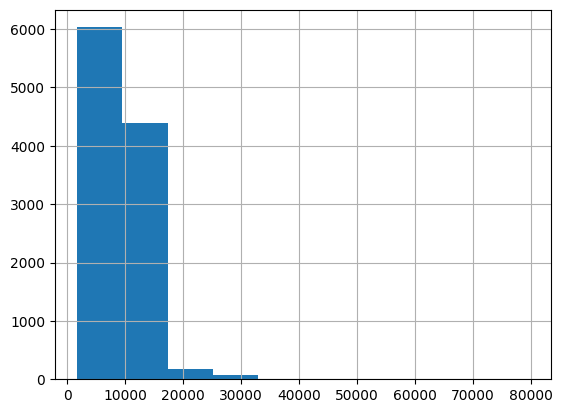

In [9]:

data['Price'].hist()

C:\Users\ferna\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


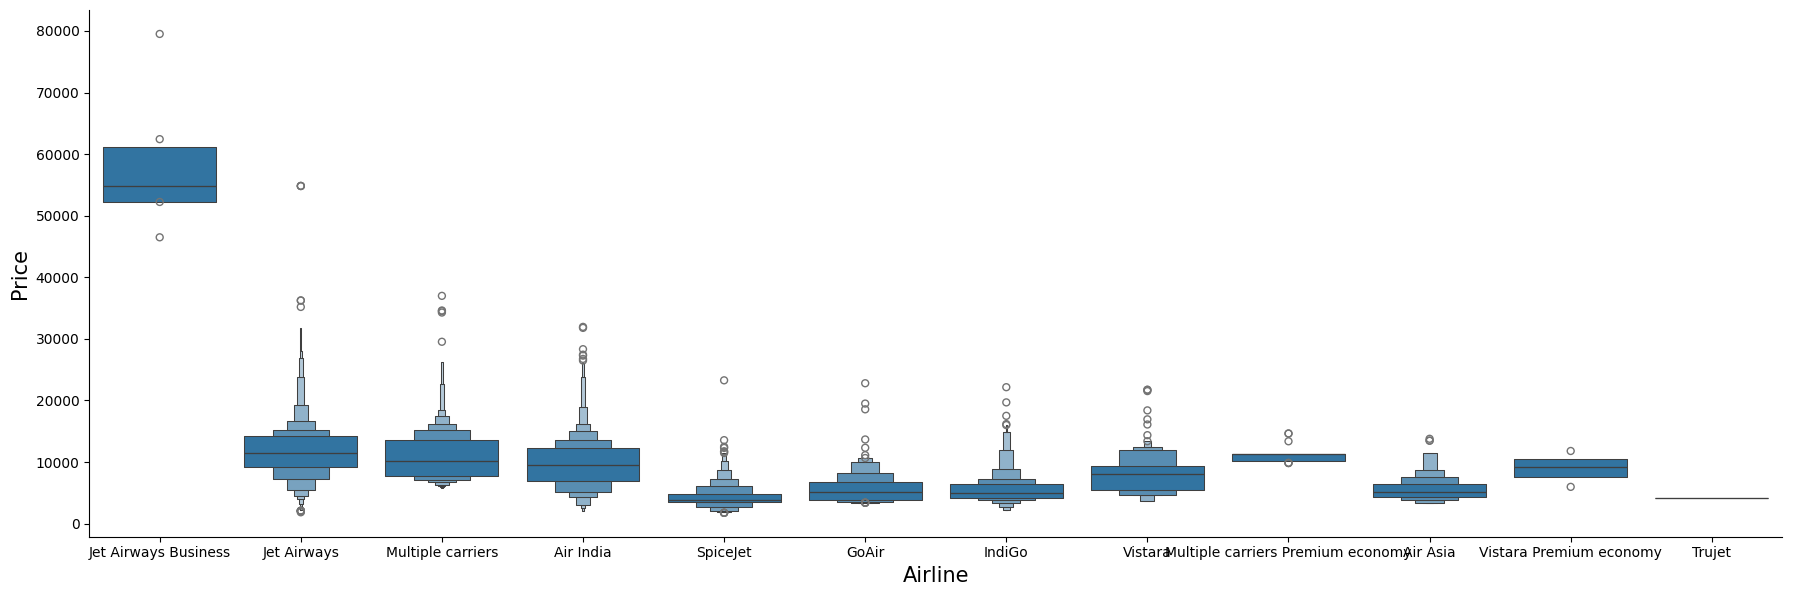

In [10]:

sns.catplot(y = 'Price', x = 'Airline', data = data.sort_values('Price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

# <h2>Feature Engineering / Data Preproccesing</h2>

In [11]:
data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey'] , format = '%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format = '%d/%m/%Y').dt.month
data.drop(columns=['Date_of_Journey'], inplace=True)
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,22,25,19,55,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,23,20,20,45,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,11,20,8,20,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,14,10,11,30,1,3


In [12]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [13]:
data.replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2,'3 stops' : 3, '4 stops' : 4}, inplace=True)
data

C:\Users\ferna\AppData\Local\Temp\ipykernel_324\2102763862.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2,'3 stops' : 3, '4 stops' : 4}, inplace=True)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,21,35,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0.0,No info,4107,22,25,19,55,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,4145,23,20,20,45,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,No info,7229,11,20,8,20,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0.0,No info,12648,14,10,11,30,1,3


In [14]:
data['Total_Stops'].value_counts()

Total_Stops
1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: count, dtype: int64

In [15]:
duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [16]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,1,10,22,20,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,13,15,5,50,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,4,25,9,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,23,30,18,5,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,21,35,16,50,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0.0,No info,4107,22,25,19,55,9,4,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,4145,23,20,20,45,27,4,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,No info,7229,11,20,8,20,27,4,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0.0,No info,12648,14,10,11,30,1,3,2,40


In [17]:
data.drop(['Duration'],axis=1,inplace=True)
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,1,10,22,20,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,13,15,5,50,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,4,25,9,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,23,30,18,5,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,21,35,16,50,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,22,25,19,55,9,4,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,23,20,20,45,27,4,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,11,20,8,20,27,4,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,14,10,11,30,1,3,2,40


In [18]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [19]:
Airline = data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [20]:
list1 = ['Source', 'Destination']
for l in list1:
    print(data[[l]].value_counts(), '\n')

Source  
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4537
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [21]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data

,Airline,Route,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,...,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,0.0,No info,3897,1,10,22,20,24,...,50,False,False,False,False,False,False,False,False,True
1,Air India,CCU → IXR → BBI → BLR,2.0,No info,7662,13,15,5,50,1,...,25,False,False,True,False,False,False,False,False,False
2,Jet Airways,DEL → LKO → BOM → COK,2.0,No info,13882,4,25,9,25,9,...,0,False,True,False,False,True,False,False,False,False
3,IndiGo,CCU → NAG → BLR,1.0,No info,6218,23,30,18,5,12,...,25,False,False,True,False,False,False,False,False,False
4,IndiGo,BLR → NAG → DEL,1.0,No info,13302,21,35,16,50,1,...,45,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,CCU → BLR,0.0,No info,4107,22,25,19,55,9,...,30,False,False,True,False,False,False,False,False,False
10679,Air India,CCU → BLR,0.0,No info,4145,23,20,20,45,27,...,35,False,False,True,False,False,False,False,False,False
10680,Jet Airways,BLR → DEL,0.0,No info,7229,11,20,8,20,27,...,0,False,False,False,False,False,True,False,False,False
10681,Vistara,BLR → DEL,0.0,No info,12648,14,10,11,30,1,...,40,False,False,False,False,False,False,False,False,True


In [22]:
data = pd.concat([data, Airline], axis = 1)
data

,Airline,Route,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,BLR → DEL,0.0,No info,3897,1,10,22,20,24,...,False,True,False,False,False,False,False,False,False,False
1,Air India,CCU → IXR → BBI → BLR,2.0,No info,7662,13,15,5,50,1,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,DEL → LKO → BOM → COK,2.0,No info,13882,4,25,9,25,9,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,CCU → NAG → BLR,1.0,No info,6218,23,30,18,5,12,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,BLR → NAG → DEL,1.0,No info,13302,21,35,16,50,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,CCU → BLR,0.0,No info,4107,22,25,19,55,9,...,False,False,False,False,False,False,False,False,False,False
10679,Air India,CCU → BLR,0.0,No info,4145,23,20,20,45,27,...,False,False,False,False,False,False,False,False,False,False
10680,Jet Airways,BLR → DEL,0.0,No info,7229,11,20,8,20,27,...,False,False,True,False,False,False,False,False,False,False
10681,Vistara,BLR → DEL,0.0,No info,12648,14,10,11,30,1,...,False,False,False,False,False,False,False,False,True,False


In [23]:
data.drop(['Airline'],axis=1,inplace=True)

data

,Route,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,BLR → DEL,0.0,No info,3897,1,10,22,20,24,3,...,False,True,False,False,False,False,False,False,False,False
1,CCU → IXR → BBI → BLR,2.0,No info,7662,13,15,5,50,1,5,...,False,False,False,False,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,2.0,No info,13882,4,25,9,25,9,6,...,False,False,True,False,False,False,False,False,False,False
3,CCU → NAG → BLR,1.0,No info,6218,23,30,18,5,12,5,...,False,True,False,False,False,False,False,False,False,False
4,BLR → NAG → DEL,1.0,No info,13302,21,35,16,50,1,3,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0.0,No info,4107,22,25,19,55,9,4,...,False,False,False,False,False,False,False,False,False,False
10679,CCU → BLR,0.0,No info,4145,23,20,20,45,27,4,...,False,False,False,False,False,False,False,False,False,False
10680,BLR → DEL,0.0,No info,7229,11,20,8,20,27,4,...,False,False,True,False,False,False,False,False,False,False
10681,BLR → DEL,0.0,No info,12648,14,10,11,30,1,3,...,False,False,False,False,False,False,False,False,True,False


In [24]:
data.drop(['Route' , 'Additional_Info'], axis = 1, inplace = True)
data

,Total_Stops,Price,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,3897,1,10,22,20,24,3,2,50,...,False,True,False,False,False,False,False,False,False,False
1,2.0,7662,13,15,5,50,1,5,7,25,...,False,False,False,False,False,False,False,False,False,False
2,2.0,13882,4,25,9,25,9,6,19,0,...,False,False,True,False,False,False,False,False,False,False
3,1.0,6218,23,30,18,5,12,5,5,25,...,False,True,False,False,False,False,False,False,False,False
4,1.0,13302,21,35,16,50,1,3,4,45,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,22,25,19,55,9,4,2,30,...,False,False,False,False,False,False,False,False,False,False
10679,0.0,4145,23,20,20,45,27,4,2,35,...,False,False,False,False,False,False,False,False,False,False
10680,0.0,7229,11,20,8,20,27,4,3,0,...,False,False,True,False,False,False,False,False,False,False
10681,0.0,12648,14,10,11,30,1,3,2,40,...,False,False,False,False,False,False,False,False,True,False


# <h2>Feature Selection/Importance</h2>

In [25]:
data = data.dropna()
data.shape

(10682, 30)

In [26]:
data.columns

Index(['Total_Stops', 'Price', 'Arrival_Hour', 'Arrival__Minute',
       'Departure_Hour', 'Departure__Minute', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_mins', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [27]:
X = data.loc[:, ['Total_Stops', 'Arrival_Hour', 'Arrival__Minute',
       'Departure_Hour', 'Departure__Minute', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_mins', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']]
X.head()

,Total_Stops,Arrival_Hour,Arrival__Minute,Departure_Hour,Departure__Minute,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Source_Chennai,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,1,10,22,20,24,3,2,50,False,...,False,True,False,False,False,False,False,False,False,False
1,2.0,13,15,5,50,1,5,7,25,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,4,25,9,25,9,6,19,0,False,...,False,False,True,False,False,False,False,False,False,False
3,1.0,23,30,18,5,12,5,5,25,False,...,False,True,False,False,False,False,False,False,False,False
4,1.0,21,35,16,50,1,3,4,45,False,...,False,True,False,False,False,False,False,False,False,False


In [28]:
y = data.loc[:, 'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [29]:
X.isnull().sum()

Total_Stops                          0
Arrival_Hour                         0
Arrival__Minute                      0
Departure_Hour                       0
Departure__Minute                    0
Journey_Day                          0
Journey_Month                        0
Duration_hours                       0
Duration_mins                        0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin                   0
Destination_Delhi                    0
Destination_Hyderabad                0
Destination_Kolkata                  0
Destination_New Delhi                0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                 

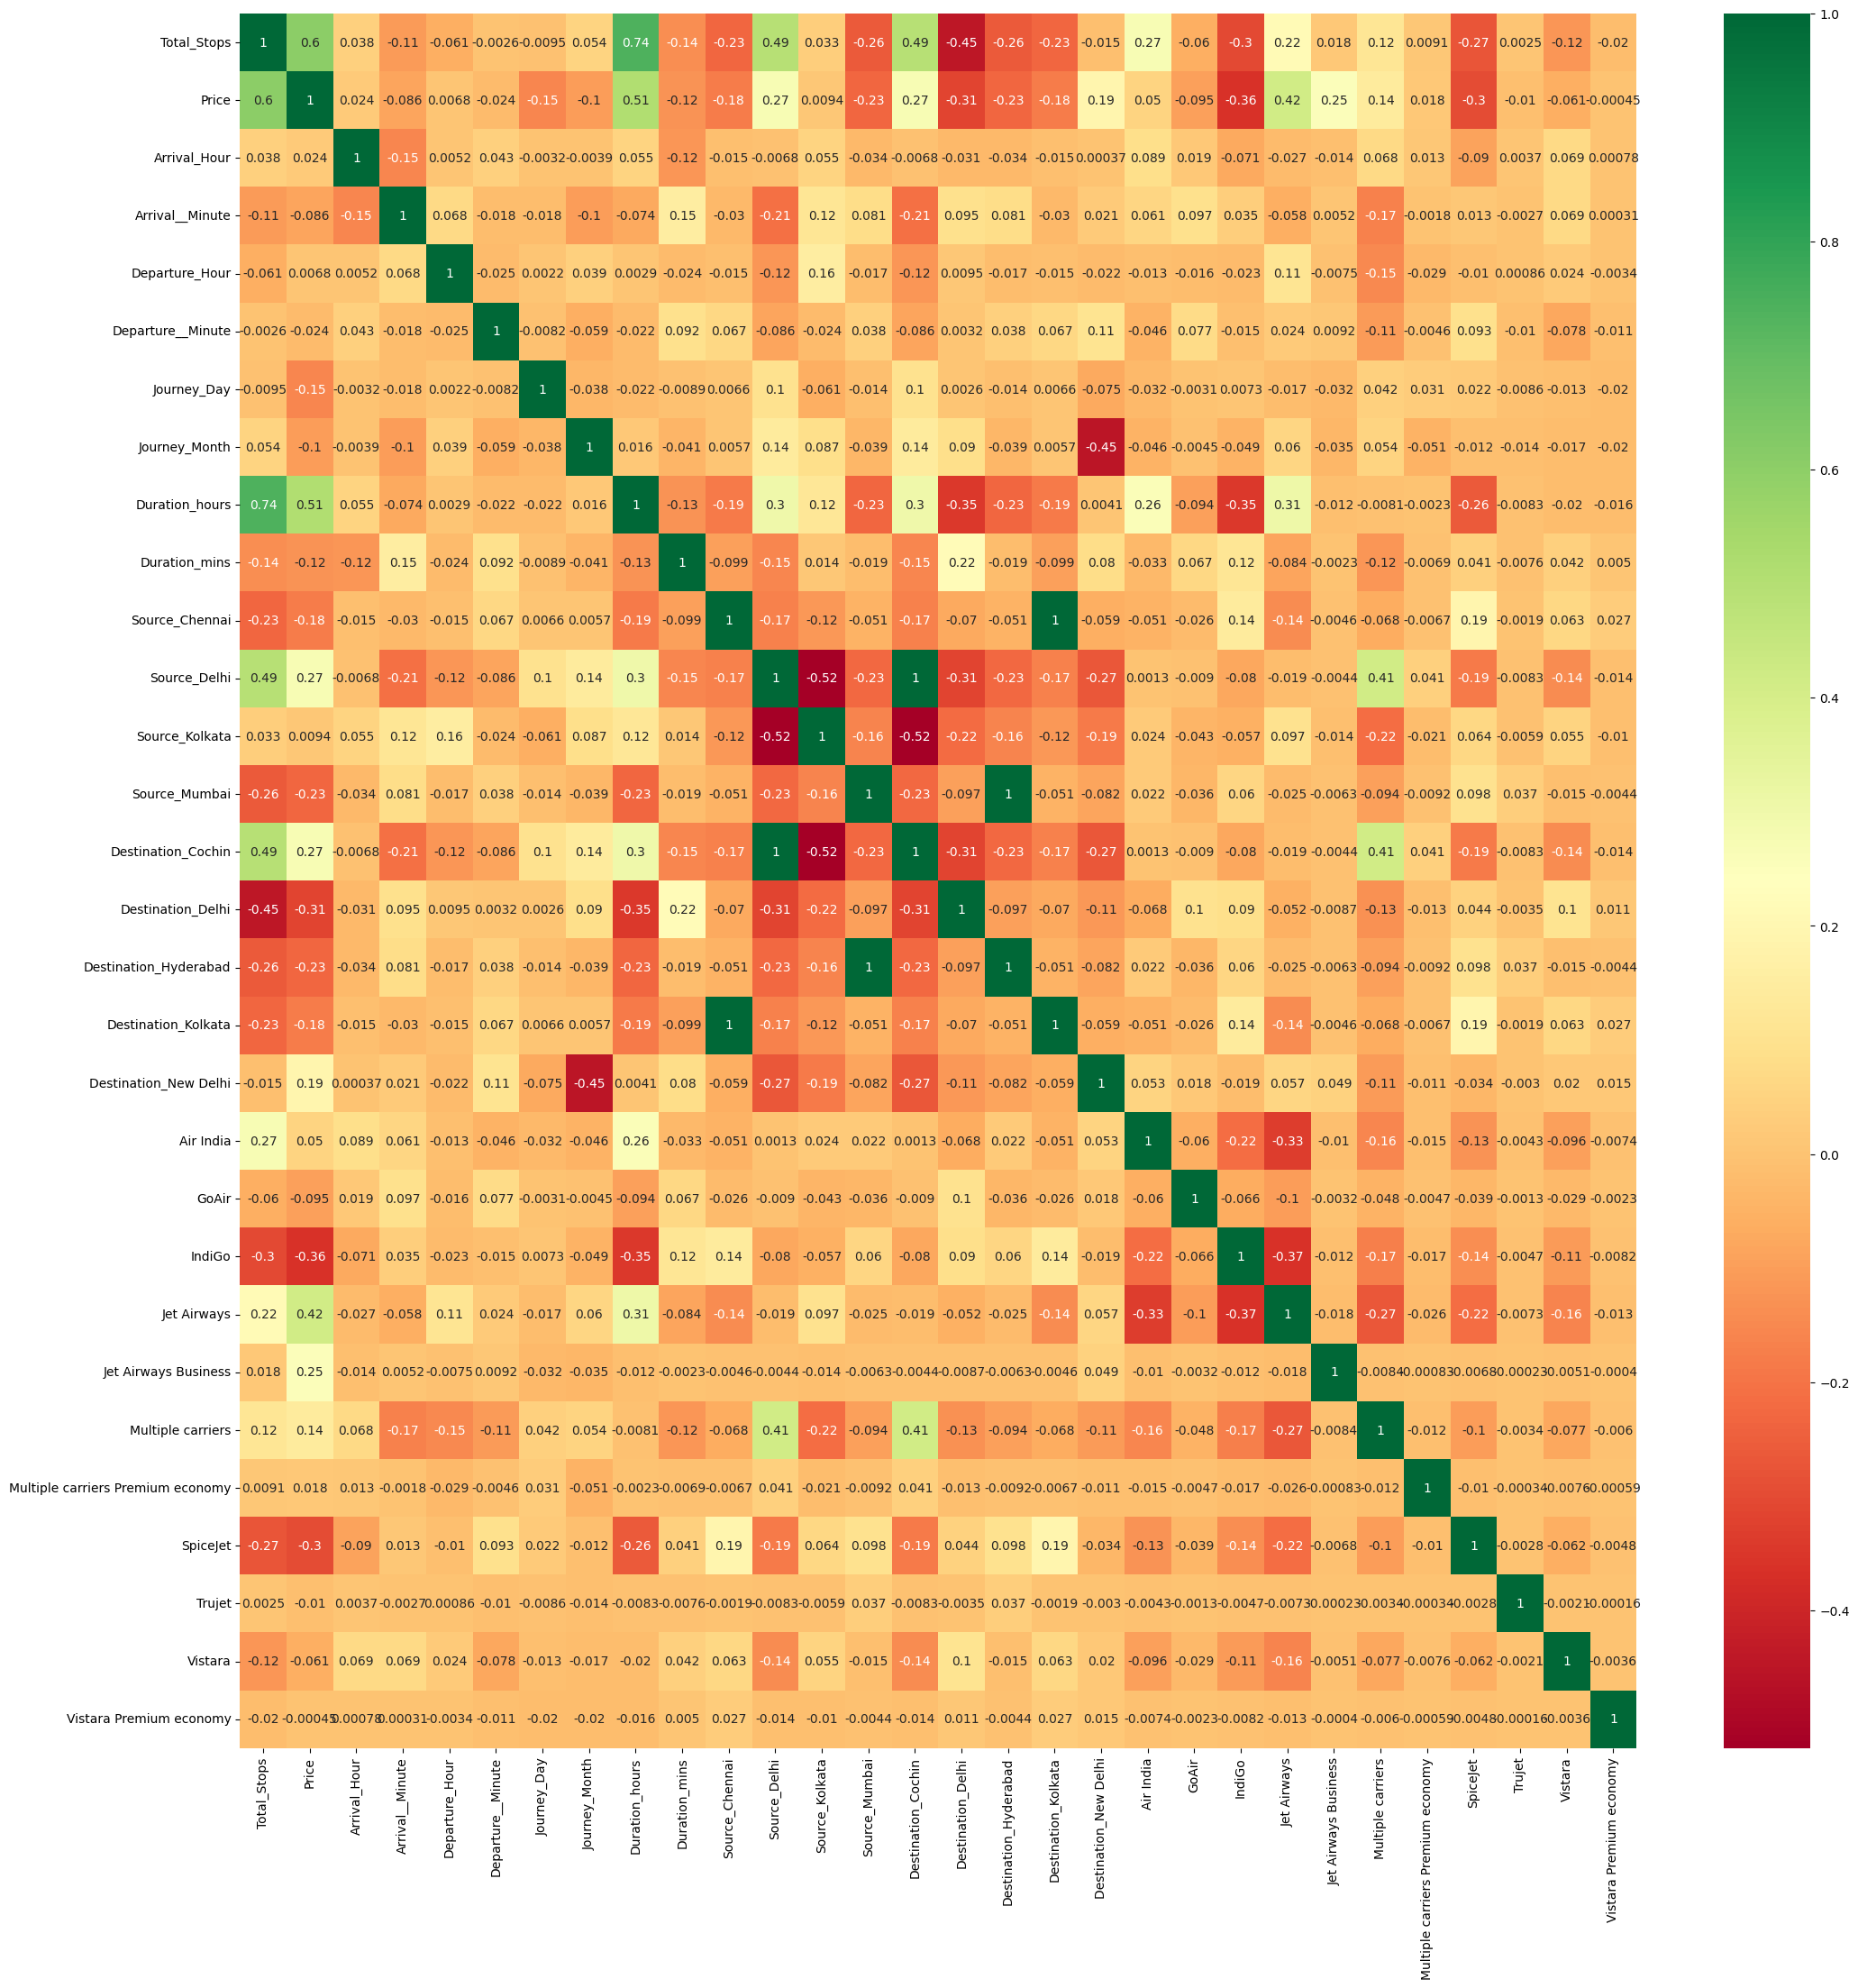

In [30]:
plt.figure(figsize = (25, 25))
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [31]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [32]:
print(selection.feature_importances_)

[2.36560661e-01 2.78520601e-02 1.88136196e-02 2.47154135e-02
 2.08813301e-02 1.44692525e-01 5.24113608e-02 1.15002872e-01
 1.76218817e-02 5.19349941e-04 9.15982170e-03 3.30629815e-03
 6.37986481e-03 1.24598040e-02 1.65843654e-02 6.28826291e-03
 4.33277884e-04 2.49432052e-02 9.01103747e-03 2.22039832e-03
 1.94414562e-02 1.36556735e-01 6.73070639e-02 1.73074761e-02
 8.15621144e-04 3.67455288e-03 1.20329049e-04 4.82397877e-03
 9.53766784e-05]


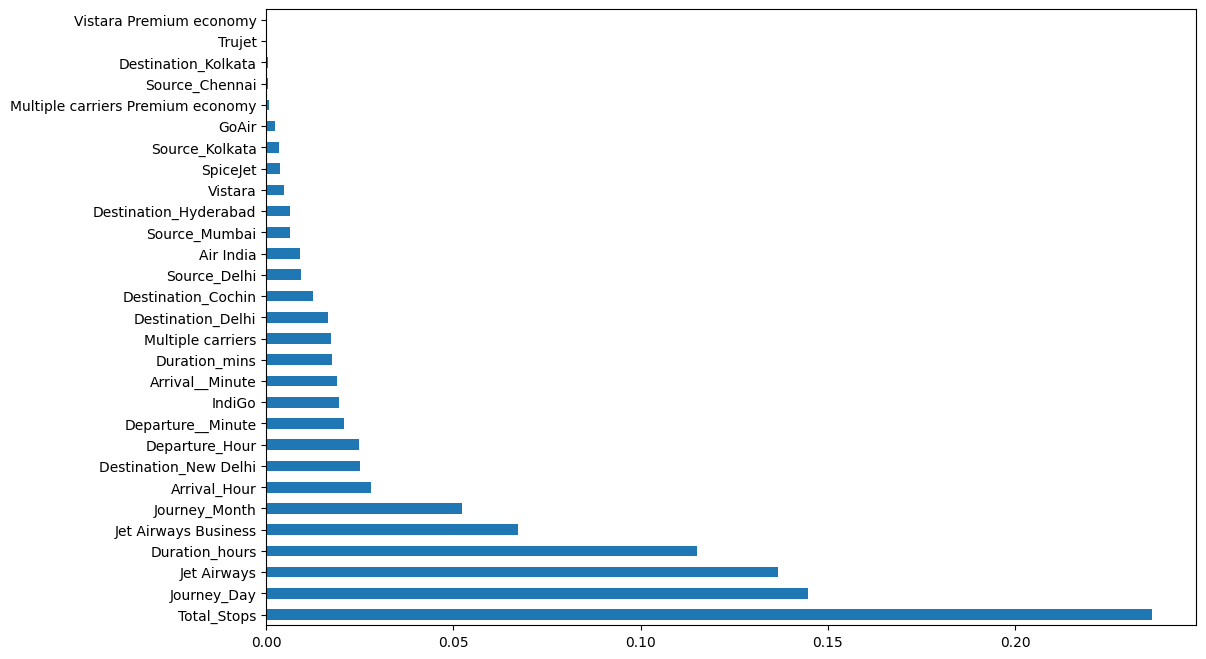

In [33]:
# Feature Importances

plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# <h2>Feature Scaling</h2>

In [34]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

array([-1.22066609, -1.80043628, -0.8900139 ,  1.65415376, -0.2349499 ,
        1.23728754, -1.46740227, -0.97061397,  1.27904078, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082])

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7477, 29), (3205, 29), (7477,), (3205,))

# <h2><center>ExtraTreesRegressor Model</center></h2>

In [37]:
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    return r2_score(y_true, y_pred)
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy_val = 100 - mape
    print(accuracy_val)
    return accuracy_val

y_pred = selection.predict(x_test)

In [39]:
r2_score_ETR = metrics(y_test, y_pred)
accuracy_ETR = accuracy(y_test, y_pred)

RMSE: 2048.292296474368
R_Squared_Value: 0.7900554687534942
86.61058505351235


# <h2><center>Linear Regression Model</center></h2>

In [40]:
from sklearn.linear_model import LinearRegression

model_lm = LinearRegression()
model_lm.fit(x_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    return r2_score(y_true, y_pred)
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy_val = 100 - mape
    print(accuracy_val)
    return accuracy_val

In [42]:
y_pred = model_lm.predict(x_test)

In [43]:
accuracy_LM = accuracy(y_test, y_pred)
r2_score_LM = metrics(y_test, y_pred)

76.18171034461692
RMSE: 2753.6703956154897
R_Squared_Value: 0.6205586872308033


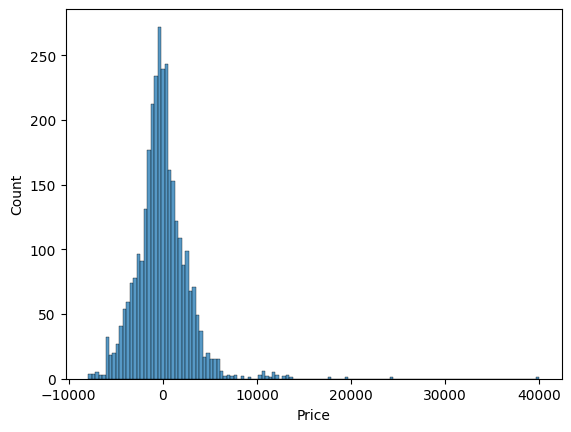

In [44]:
sns.histplot(y_test-y_pred)
plt.show()

# <h2><center>XGBoost Model</center></h2>

In [45]:
import xgboost as xg

In [46]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [47]:
xgb_r.fit(x_train, y_train)

C:\Users\ferna\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:51:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [48]:
pred = xgb_r.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error as MSE

In [50]:
r2_score_xgb = metrics(y_test, pred)

RMSE: 1989.658136464654
R_Squared_Value: 0.8019031286239624


In [51]:
accuracy_xgb = accuracy(y_test, pred)

82.97242234388062


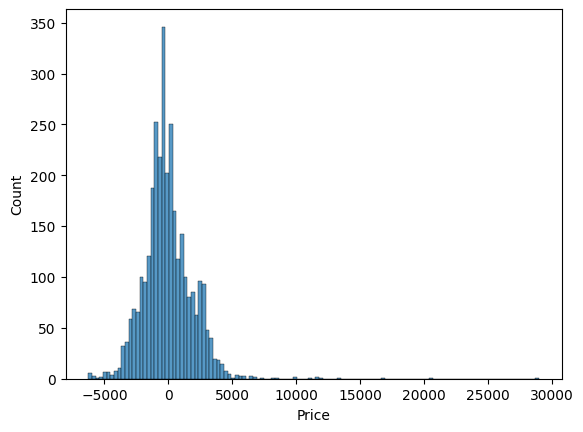

In [52]:
sns.histplot(y_test-pred)
plt.show()

# <center>Random Forest Model</center>

In [53]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3)

In [54]:
pred_rf = model_random_forest.predict(x_test)

In [55]:
r2_score_RF = metrics(y_test, pred_rf)

RMSE: 1820.2575866719255
R_Squared_Value: 0.8341992835986605


In [56]:
accuracy_RF = accuracy(y_test, pred_rf)

87.30025660957523


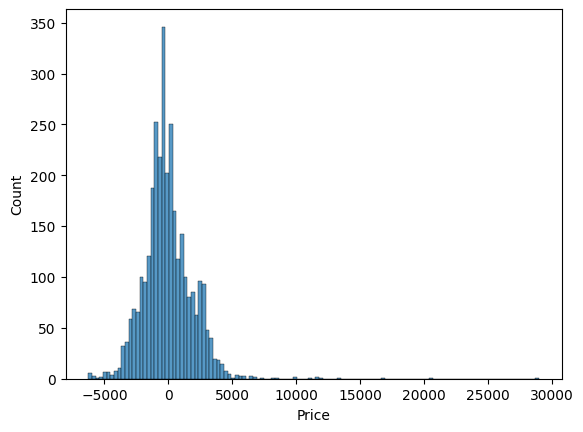

In [57]:
sns.histplot(y_test-pred)
plt.show()

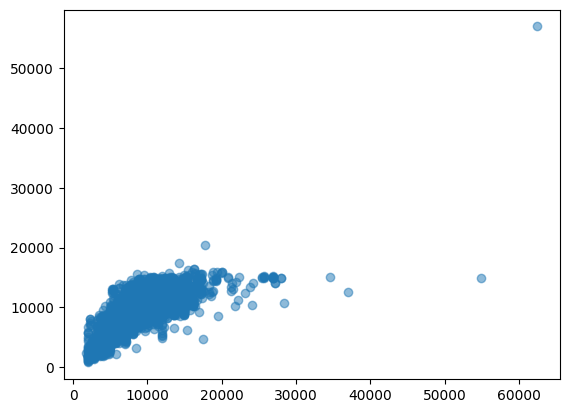

In [58]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

# <h2>Saving the File</h2>

In [59]:
choices = { 
    accuracy_ETR : selection,
    accuracy_LM : model_lm,
    accuracy_RF : model_random_forest,
    accuracy_xgb : xgb_r,
}

best_choice = max(choices.keys())
best_model = choices[best_choice]

In [60]:
import pickle

In [61]:
model = best_model
with open("flight.pkl", "wb") as f:
    pickle.dump(model, f)




In [ ]:
with open("AccuracyValues.txt" , "w") as f : 
    f.write(f"{accuracy_ETR}\n")
    f.write(f"{accuracy_LM}\n")
    f.write(f"{accuracy_RF}\n")
    f.write(f"{accuracy_xgb}\n")

    f.write(f"{r2_score_ETR}\n")
    f.write(f"{r2_score_LM}\n")
    f.write(f"{r2_score_RF}\n")
    f.write(f"{r2_score_xgb}\n")
